In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ml_helpers

In [2]:
_rand_amount_to_make = 1000

# Make random dates
start_date = datetime.date(2020,1,4)
end_date = datetime.date(2020,11,23)
rand_dates = ml_helpers.gen_random_dates(start_date, end_date, _rand_amount_to_make)

# Make random profit loss values
rand_arr = 1000 * np.random.randn(_rand_amount_to_make)
rand_arr = rand_arr.tolist()

In [3]:
df = pd.DataFrame(dict(dates=rand_dates, profit_loss=rand_arr))
df['dates'] = pd.to_datetime(df.dates)

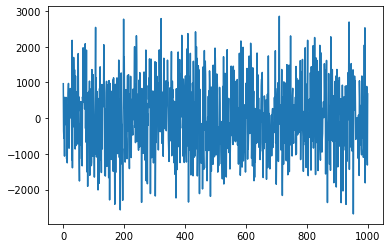

In [4]:
plt.plot(df.profit_loss)

In [5]:
df['pl_pct'] = df.profit_loss.pct_change()

feature_names = ['profit_loss']

ma_periods = [5, 20, 30, 50, 100]
for i in ma_periods:
    ma_name = 'ma_' + str(i)
    feature_names.append(ma_name)
    df[ma_name] = df.profit_loss.rolling(i).mean()

df = df.dropna()

In [6]:
features = df[feature_names]
targets = df['pl_pct']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, shuffle=False)

In [9]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [15]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

RMSE Train: 28.48265315873156
RMSE Test: 12.535445623657838

R2 Train: 0.692826824627669
R2 Test: -2.1987566624390866



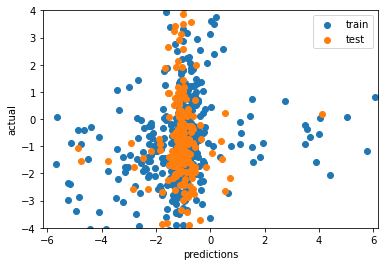

In [25]:
rfr = RandomForestRegressor(n_estimators=200,
                            max_depth=5,
                            max_features=2,
                            min_samples_split=4,
                            oob_score=True,
                            random_state=44)

ml_helpers.model_res(rfr, X_train, X_test, y_train, y_test)

RMSE Train: 46.023006915186734
RMSE Test: 16.95922683898511

R2 Train: 0.1980036637857273
R2 Test: -4.854822687564449



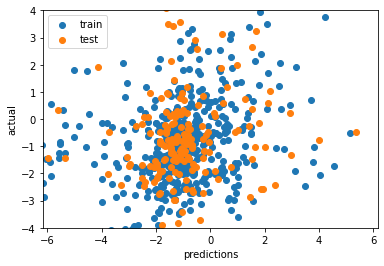

In [33]:
knn = KNeighborsRegressor(n_neighbors=7)
ml_helpers.model_res(knn, X_train, X_test, y_train, y_test)

In [46]:
# Ensembling

models = [rfr, knn]

train_preds = []
test_preds = []

for model in models:
    train_pred = model.predict(X_train).reshape(1, -1)
    test_pred = model.predict(X_test).reshape(1, -1)

    train_preds.append(train_pred)
    test_preds.append(test_pred)

train_preds_mean = np.mean(np.vstack(tuple(train_preds)), axis=0)
test_preds_mean = np.mean(np.vstack(tuple(test_preds)), axis=0)

RMSE Train: 36.50250862132545
RMSE Test: 13.331263807016589

R2 Train: 0.4954922652818595
R2 Test: -2.617797830117391



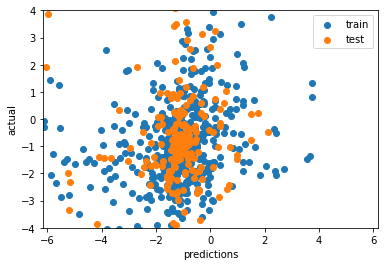

In [47]:
ml_helpers.plot_predict(y_train, y_test, train_preds_mean, test_preds_mean)